# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Regression Model Evaluation

In [4]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
linreg_model=LinearRegression(fit_intercept=True, n_jobs=-1)
linreg_model.fit(X_train, y_train)
y_pred_train=linreg_model.predict(X_train)

In [7]:
linreg_model.fit(X_test, y_test)
y_pred_test=linreg_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
r2_score(y_train, y_pred_train),r2_score(y_test, y_pred_test)

(0.7561033524154578, 0.7873845800072771)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
mean_squared_error(y_train, y_pred_train),mean_squared_error(y_test, y_pred_test)

(20.652102653603194, 17.72125922139721)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [10]:
mean_absolute_error(y_train,y_pred_train),mean_absolute_error(y_test,y_pred_test)

(3.2320428453751395, 2.882821008021265)

## Classification Model Evaluation

In [11]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [32]:
log_reg=LogisticRegression()

In [33]:
log_reg.fit(X_train,y_train)
y_pred_train=log_reg.predict(X_train)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
log_reg.fit(X_test,y_test)
y_pred_test=log_reg.predict(X_test)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [17]:
accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)

(0.9666666666666667, 0.9666666666666667)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [18]:
balanced_accuracy_score(y_train,y_pred_train),balanced_accuracy_score(y_test,y_pred_test)

(0.9664224664224664, 0.9583333333333334)

## 10. Calculate and print the precision score for both the training and the testing set.

In [19]:
print(precision_score(y_train,y_pred_train,average='macro'))

0.9682637182637183


In [20]:
print(precision_score(y_test,y_pred_test,average='macro'))

0.9722222222222222


## 11. Calculate and print the recall score for both the training and the testing set.

In [22]:
print(recall_score(y_train, y_pred_train, average='macro'))

print(recall_score(y_test, y_pred_test, average='macro'))

0.9664224664224664
0.9583333333333334


## 12. Calculate and print the F1 score for both the training and the testing set.

In [23]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_test, average='macro')

0.9632850241545894

## 13. Generate confusion matrices for both the training and the testing set.

In [24]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_test)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  7]])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

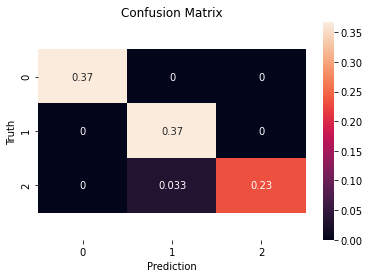

In [26]:
ax=sns.heatmap(cm(y_test, y_pred_test)/sum(sum(cm(y_test, y_pred_test))), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

In [27]:
cm(y_train, y_pred_train)

array([[39,  0,  0],
       [ 0, 36,  3],
       [ 0,  1, 41]])

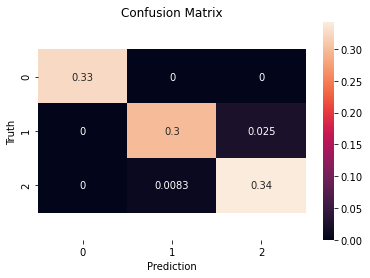

In [28]:
ax=sns.heatmap(cm(y_train, y_pred_train)/sum(sum(cm(y_train, y_pred_train))), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+.5, t-.5)
plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

models = {
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=100),
}

# Train all the models in the models dict
for name,m in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training svm-linear...
Training svm-rbf...
Training randomforest...
Train complete


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred, average = "macro"))
    printMetric("Recall",recall_score(y_test, y_pred, average = "macro"))
    printMetric("F1Score",f1_score(y_test, y_pred, average = "macro"))

print("Train complete")

Evaluating model svm-linear
	 Accuracy: 0.967
	 Precision: 0.963
	 Recall: 0.97
	 F1Score: 0.965
Evaluating model svm-rbf
	 Accuracy: 0.533
	 Precision: 0.431
	 Recall: 0.485
	 F1Score: 0.418
Evaluating model randomforest
	 Accuracy: 1.0
	 Precision: 1.0
	 Recall: 1.0
	 F1Score: 1.0
Train complete


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
